In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
dataset = randn(25)

(0, 1)

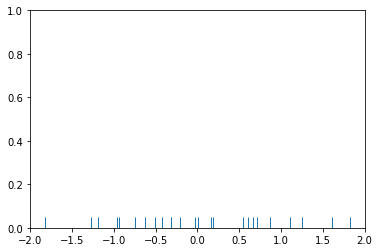

In [9]:
sns.rugplot(dataset)
plt.ylim(0, 1)

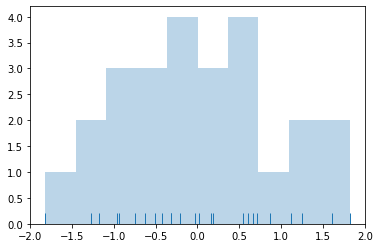

In [10]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 0.5)

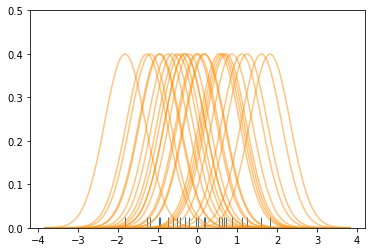

In [11]:
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5)/(3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for ploting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color="darkorange",alpha=0.5)

plt.ylim(0,0.5)

Text(0.5, 0.98, 'Sum of all basic functions')

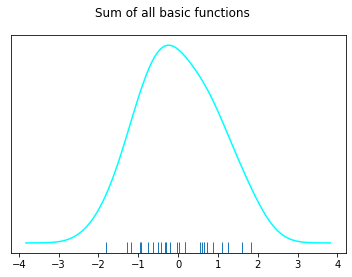

In [12]:
sum_f_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_f_kde,color='cyan')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of all basic functions")

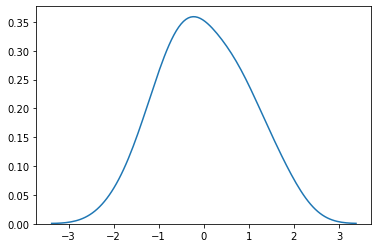

In [13]:
sns.kdeplot(dataset)

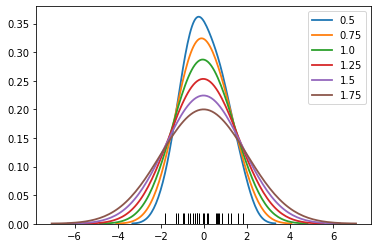

In [14]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

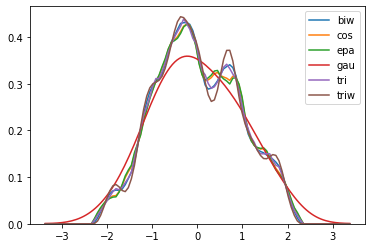

In [15]:
kernel_optiions = ['biw', 'cos','epa','gau','tri','triw']

for kern in kernel_optiions:
    sns.kdeplot(dataset,kernel=kern,label=kern)

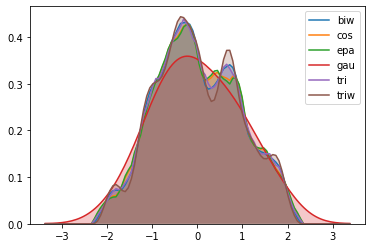

In [16]:
#shading
kernel_optiions = ['biw', 'cos','epa','gau','tri','triw']

for kern in kernel_optiions:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

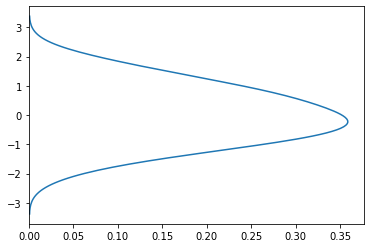

In [17]:
#ploting on vertical axis
sns.kdeplot(dataset,vertical=True)

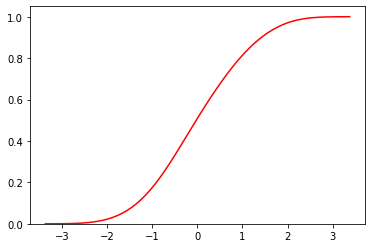

In [18]:
#cumulative distribution function = CDF
sns.kdeplot(dataset,cumulative=True,color='red')

C:\Users\nenad\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


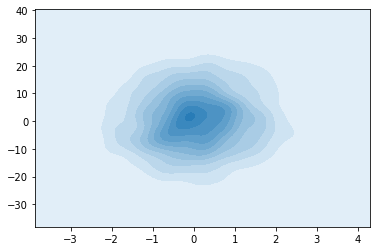

In [19]:
#KDE for multidimensional sets
mean = [0,0]

cov = [[1,0],[0,100]]
       
dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe,shade=True)

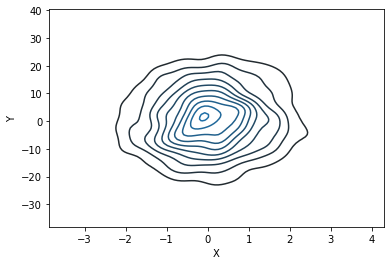

In [20]:
#setting two vectors separetely
sns.kdeplot(dframe.X,dframe.Y)

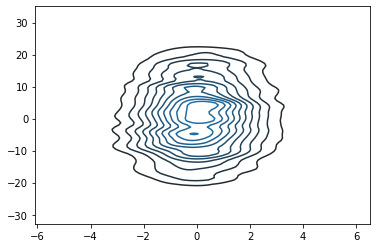

In [21]:
sns.kdeplot(dframe,bw=1)

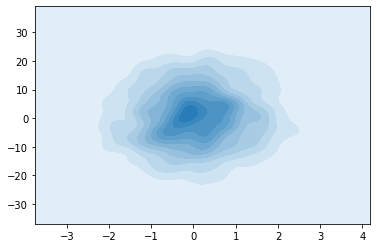

In [22]:
sns.kdeplot(dframe,bw='silverman',shade=True)

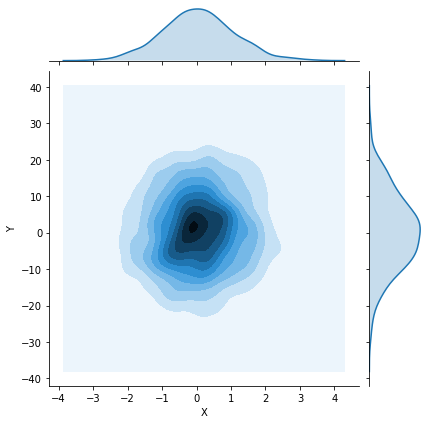

In [23]:
sns.jointplot('X','Y',dframe,kind='kde')